# Blood Bowl Team Player Costs

We are going to find out which Blood Bowl team players are more expensive.

For that we are going to use the following datasets:

- Blood Bowl teams

## Setting Up

In [1]:
import pandas as pd
import calendar

teams = pd.read_csv("../datasets/bloodbowl_teams.csv")

# Default value
# teams = teams.fillna("")

### Recovering the Lists

The skill lists are loaded as a string. Lets fix this.

In [2]:
def getList(value):
    """
    Splits values into a list.
    """
    result = []
    
    if value == value:
        result = value.split("|")
    
    return result

In [3]:
teams["skills"] = teams["skills"].apply(getList)
teams.head()

,team,title,min,max,cost,ma,st,ag,av,skills,normal,double
0,Amazon,Tribal Linewoman,0,16,50000,6,3,3,7,[Dodge],G,ASP
1,Amazon,Eagle Warrior Throwers,0,2,70000,6,3,3,7,"[Dodge, Pass]",GP,AS
2,Amazon,Piranha Warrior Catchers,0,2,70000,6,3,3,7,"[Catch, Dodge]",GA,SP
3,Amazon,Koka Kalim Blitzers,0,4,90000,6,3,3,7,"[Block, Dodge]",GS,AP
4,Chaos Dwarf,Hobgoblin Runners,0,16,40000,6,3,3,7,[],G,ASP


## Exploring Data

The teams are defined by the available players and their stats. These include the number of players included in the team.

In [4]:
teams

,team,title,min,max,cost,ma,st,ag,av,skills,normal,double
0,Amazon,Tribal Linewoman,0,16,50000,6,3,3,7,[Dodge],G,ASP
1,Amazon,Eagle Warrior Throwers,0,2,70000,6,3,3,7,"[Dodge, Pass]",GP,AS
2,Amazon,Piranha Warrior Catchers,0,2,70000,6,3,3,7,"[Catch, Dodge]",GA,SP
3,Amazon,Koka Kalim Blitzers,0,4,90000,6,3,3,7,"[Block, Dodge]",GS,AP
4,Chaos Dwarf,Hobgoblin Runners,0,16,40000,6,3,3,7,[],G,ASP
...,...,...,...,...,...,...,...,...,...,...,...,...
99,Wood Elf,Throwers,0,2,90000,7,3,4,7,[Pass],GAP,S
100,Wood Elf,Wardancers,0,2,120000,8,3,4,7,"[Block, Dodge, Leap]",GA,SP
101,Wood Elf,Treeman,0,1,120000,2,6,1,10,"[Loner, Mighty Blow, Stand Firm, Strong Arm, T...",S,GAP
102,Vampire,Thrall Linemen,0,16,40000,6,3,3,7,[],G,ASP


# Derived Values

It will be easier if we get some stats from the values, such as the average cost of the attributes.

In [5]:
def getCostByAttrPoint(group):
    """
    Returns the cost by point for attributes.
    """
    return group["cost"] / group["attribute_sum"]

In [6]:
teams["attribute_sum"] = teams.apply(lambda x: x["ma"] + x["st"] + x["ag"] + x["av"], axis=1)
teams["skill_count"] = teams.apply(lambda x: len(x["skills"]), axis=1)
teams["attr_point_cost"] = teams.apply(getCostByAttrPoint, axis=1)
teams

,team,title,min,max,cost,ma,st,ag,av,skills,normal,double,attribute_sum,skill_count,attr_point_cost
0,Amazon,Tribal Linewoman,0,16,50000,6,3,3,7,[Dodge],G,ASP,19,1,2631.578947
1,Amazon,Eagle Warrior Throwers,0,2,70000,6,3,3,7,"[Dodge, Pass]",GP,AS,19,2,3684.210526
2,Amazon,Piranha Warrior Catchers,0,2,70000,6,3,3,7,"[Catch, Dodge]",GA,SP,19,2,3684.210526
3,Amazon,Koka Kalim Blitzers,0,4,90000,6,3,3,7,"[Block, Dodge]",GS,AP,19,2,4736.842105
4,Chaos Dwarf,Hobgoblin Runners,0,16,40000,6,3,3,7,[],G,ASP,19,0,2105.263158
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Wood Elf,Throwers,0,2,90000,7,3,4,7,[Pass],GAP,S,21,1,4285.714286
100,Wood Elf,Wardancers,0,2,120000,8,3,4,7,"[Block, Dodge, Leap]",GA,SP,22,3,5454.545455
101,Wood Elf,Treeman,0,1,120000,2,6,1,10,"[Loner, Mighty Blow, Stand Firm, Strong Arm, T...",S,GAP,19,7,6315.789474
102,Vampire,Thrall Linemen,0,16,40000,6,3,3,7,[],G,ASP,19,0,2105.263158


# Average Attributes

It's easy getting the average values for each team. But these mean little, as not all profiles may appear in the same quantity. Meaning each profile will have their own weight.

So we will calculate both a direct average and a weighted one.

## Profile (Direct) Average

These are the average values for the profiles. Not for the team. As the weight wasn't taken into account.

In [7]:
teams_average_attributes = teams[["team", "ma", "st", "ag", "av", "attribute_sum", "cost", "attr_point_cost"]]
teams_average_attributes = teams_average_attributes.groupby("team").mean()
teams_average_attributes = teams_average_attributes.sort_values(["team"])
teams_average_attributes

,ma,st,ag,av,attribute_sum,cost,attr_point_cost
team,,,,,,,
Amazon,6.000000,3.000000,3.000000,7.000000,19.000000,70000.000000,3684.210526
Chaos Chosen,5.333333,4.000000,2.666667,8.333333,20.333333,103333.333333,5087.301587
Chaos Dwarf,5.250000,3.750000,2.250000,8.250000,19.500000,97500.000000,4921.157059
Chaos Renegades,5.500000,3.625000,2.625000,8.125000,19.875000,82500.000000,4126.461988
Dark Elf,6.600000,3.000000,4.000000,7.400000,21.000000,90000.000000,4285.281385
Dwarf,4.800000,3.800000,2.200000,8.800000,19.600000,96000.000000,4832.323232
Elven Union,6.750000,3.000000,4.000000,7.250000,21.000000,85000.000000,4011.363636
Goblin,5.500000,3.000000,2.750000,7.250000,18.500000,62500.000000,3357.821637
Halfling,3.500000,4.000000,2.000000,8.000000,17.500000,75000.000000,4095.394737


## Team (Weighted) Average

Now these are the average values for the team itself.

### Proportions

First we need to know how many profiles make up the team.

It should be noted that the max number of players in a team is 16, but we are working with the full range of options. And we will match each profile to the percentage of these options it represents.

In [8]:
teams_range = teams[["team", "min", "max"]]
teams_range = teams_range.groupby("team").sum()
teams_range

,min,max
team,,
Amazon,0,24
Chaos Chosen,0,21
Chaos Dwarf,0,25
Chaos Renegades,0,19
Dark Elf,0,26
Dwarf,0,23
Elven Union,0,24
Goblin,0,24
Halfling,0,18


In [9]:
def getProportion(group):
   return group["max"] / teams_range["max"][group["team"]]

In [10]:
teams['proportion'] = teams.apply(getProportion, axis=1)
teams

,team,title,min,max,cost,ma,st,ag,av,skills,normal,double,attribute_sum,skill_count,attr_point_cost,proportion
0,Amazon,Tribal Linewoman,0,16,50000,6,3,3,7,[Dodge],G,ASP,19,1,2631.578947,0.666667
1,Amazon,Eagle Warrior Throwers,0,2,70000,6,3,3,7,"[Dodge, Pass]",GP,AS,19,2,3684.210526,0.083333
2,Amazon,Piranha Warrior Catchers,0,2,70000,6,3,3,7,"[Catch, Dodge]",GA,SP,19,2,3684.210526,0.083333
3,Amazon,Koka Kalim Blitzers,0,4,90000,6,3,3,7,"[Block, Dodge]",GS,AP,19,2,4736.842105,0.166667
4,Chaos Dwarf,Hobgoblin Runners,0,16,40000,6,3,3,7,[],G,ASP,19,0,2105.263158,0.640000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99,Wood Elf,Throwers,0,2,90000,7,3,4,7,[Pass],GAP,S,21,1,4285.714286,0.080000
100,Wood Elf,Wardancers,0,2,120000,8,3,4,7,"[Block, Dodge, Leap]",GA,SP,22,3,5454.545455,0.080000
101,Wood Elf,Treeman,0,1,120000,2,6,1,10,"[Loner, Mighty Blow, Stand Firm, Strong Arm, T...",S,GAP,19,7,6315.789474,0.040000
102,Vampire,Thrall Linemen,0,16,40000,6,3,3,7,[],G,ASP,19,0,2105.263158,0.727273


### Weighted Values

In [11]:
def weighted_average(group):
   proportion = group["proportion"]
   group["ma"] = group["ma"] * proportion
   group["st"] = group["st"] * proportion
   group["ag"] = group["ag"] * proportion
   group["av"] = group["av"] * proportion
   group["attribute_sum"] = group["attribute_sum"] * proportion
   group["cost"] = group["cost"] * proportion
   group["attr_point_cost"] = group["attr_point_cost"] * proportion
   return group

In [12]:
teams_weighted = teams[["team", "title", "ma", "st", "ag", "av", "attribute_sum", "cost", "min", "max", "attr_point_cost", "proportion"]]
teams_weighted = teams_weighted.apply(weighted_average, axis=1)
teams_weighted

,team,title,ma,st,ag,av,attribute_sum,cost,min,max,attr_point_cost,proportion
0,Amazon,Tribal Linewoman,4.000000,2.000000,2.000000,4.666667,12.666667,33333.333333,0,16,1754.385965,0.666667
1,Amazon,Eagle Warrior Throwers,0.500000,0.250000,0.250000,0.583333,1.583333,5833.333333,0,2,307.017544,0.083333
2,Amazon,Piranha Warrior Catchers,0.500000,0.250000,0.250000,0.583333,1.583333,5833.333333,0,2,307.017544,0.083333
3,Amazon,Koka Kalim Blitzers,1.000000,0.500000,0.500000,1.166667,3.166667,15000.000000,0,4,789.473684,0.166667
4,Chaos Dwarf,Hobgoblin Runners,3.840000,1.920000,1.920000,4.480000,12.160000,25600.000000,0,16,1347.368421,0.640000
...,...,...,...,...,...,...,...,...,...,...,...,...
99,Wood Elf,Throwers,0.560000,0.240000,0.320000,0.560000,1.680000,7200.000000,0,2,342.857143,0.080000
100,Wood Elf,Wardancers,0.640000,0.240000,0.320000,0.560000,1.760000,9600.000000,0,2,436.363636,0.080000
101,Wood Elf,Treeman,0.080000,0.240000,0.040000,0.400000,0.760000,4800.000000,0,1,252.631579,0.040000
102,Vampire,Thrall Linemen,4.363636,2.181818,2.181818,5.090909,13.818182,29090.909091,0,16,1531.100478,0.727273


### Weighted Average Values

In [13]:
teams_average_weighted = teams_weighted[["team", "ma", "st", "ag", "av", "attribute_sum", "cost", "attr_point_cost"]]
teams_average_weighted = teams_average_weighted.groupby("team").mean()
teams_average_weighted

,ma,st,ag,av,attribute_sum,cost,attr_point_cost
team,,,,,,,
Amazon,1.500000,0.750000,0.750000,1.750000,4.750000,15000.000000,789.473684
Chaos Chosen,1.920635,1.095238,0.984127,2.730159,6.730159,23968.253968,1183.295540
Chaos Dwarf,1.370000,0.790000,0.660000,1.920000,4.740000,14700.000000,768.984962
Chaos Renegades,0.723684,0.407895,0.355263,1.006579,2.493421,7960.526316,398.103263
Dark Elf,1.261538,0.600000,0.800000,1.553846,4.215385,16000.000000,758.541459
Dwarf,0.869565,0.634783,0.426087,1.773913,3.704348,15478.260870,830.390865
Elven Union,1.604167,0.750000,1.000000,1.770833,5.125000,17916.666667,866.477273
Goblin,0.718750,0.307292,0.354167,0.895833,2.276042,6302.083333,343.673855
Halfling,2.333333,1.222222,1.388889,3.222222,8.166667,20000.000000,1184.210526


# Visualization

## Data Matrix

Before plotting we need to build the data. This will be a combination of the averages and the weighted averages. Using the teams as a common root.

In [14]:
team_costs_average = teams_average_attributes[["cost"]]
team_costs_weighted = teams_average_weighted[["cost"]]

In [15]:
team_costs = team_costs_average.merge(team_costs_weighted, on="team")
team_costs.rename(columns={'cost_x': 'profile_cost', 'attr_point_cost_y': 'team_player_cost'}, inplace=True)
team_costs

,cost_x,cost_y
team,,
Amazon,70000.000000,15000.000000
Chaos Chosen,103333.333333,23968.253968
Chaos Dwarf,97500.000000,14700.000000
Chaos Renegades,82500.000000,7960.526316
Dark Elf,90000.000000,16000.000000
Dwarf,96000.000000,15478.260870
Elven Union,85000.000000,17916.666667
Goblin,62500.000000,6302.083333
Halfling,75000.000000,20000.000000


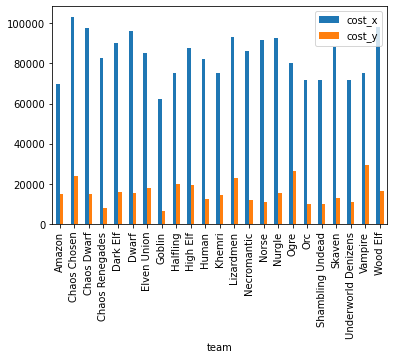

In [19]:
team_costs.plot.bar();

There is a huge difference between

In [16]:
def normalize(df):
    result = df.copy()
    for feature_name in df.columns:
        max_value = df[feature_name].max()
        min_value = df[feature_name].min()
        result[feature_name] = (df[feature_name] - min_value) / (max_value - min_value)
    return result

In [17]:
team_costs = normalize(team_costs)
team_costs

,cost_x,cost_y
team,,
Amazon,70000.000000,15000.000000
Chaos Chosen,103333.333333,23968.253968
Chaos Dwarf,97500.000000,14700.000000
Chaos Renegades,82500.000000,7960.526316
Dark Elf,90000.000000,16000.000000
Dwarf,96000.000000,15478.260870
Elven Union,85000.000000,17916.666667
Goblin,62500.000000,6302.083333
Halfling,75000.000000,20000.000000


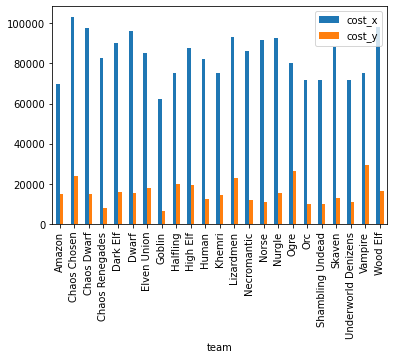

In [18]:
team_costs.plot.bar();